In this notebook i am used house price predicting problem and used linear regression as a model for calculating predictions.

[link for the dataset](https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv)

## Importing Liabraries

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [42]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

In [43]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Preprocessing

In [44]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [45]:
from sklearn import preprocessing

# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = house_data.drop('price', axis = 1).columns[:]
x = house_data.loc[:, col_name]
y = house_data['price']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(house_data.head())
x.head()

      price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ... -122.257           1340        5650
1  538000.0         3       2.25  ... -122.319           1690        7639
2  180000.0         2       1.00  ... -122.233           2720        8062
3  604000.0         4       3.00  ... -122.393           1360        5000
4  510000.0         3       2.00  ... -122.045           1800        7503

[5 rows x 19 columns]


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.164770,0.005732
1,0.090909,0.28125,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.226055,0.008017
2,0.060606,0.12500,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.406409,0.008503
3,0.121212,0.37500,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.168272,0.004985
4,0.090909,0.25000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.245316,0.007861


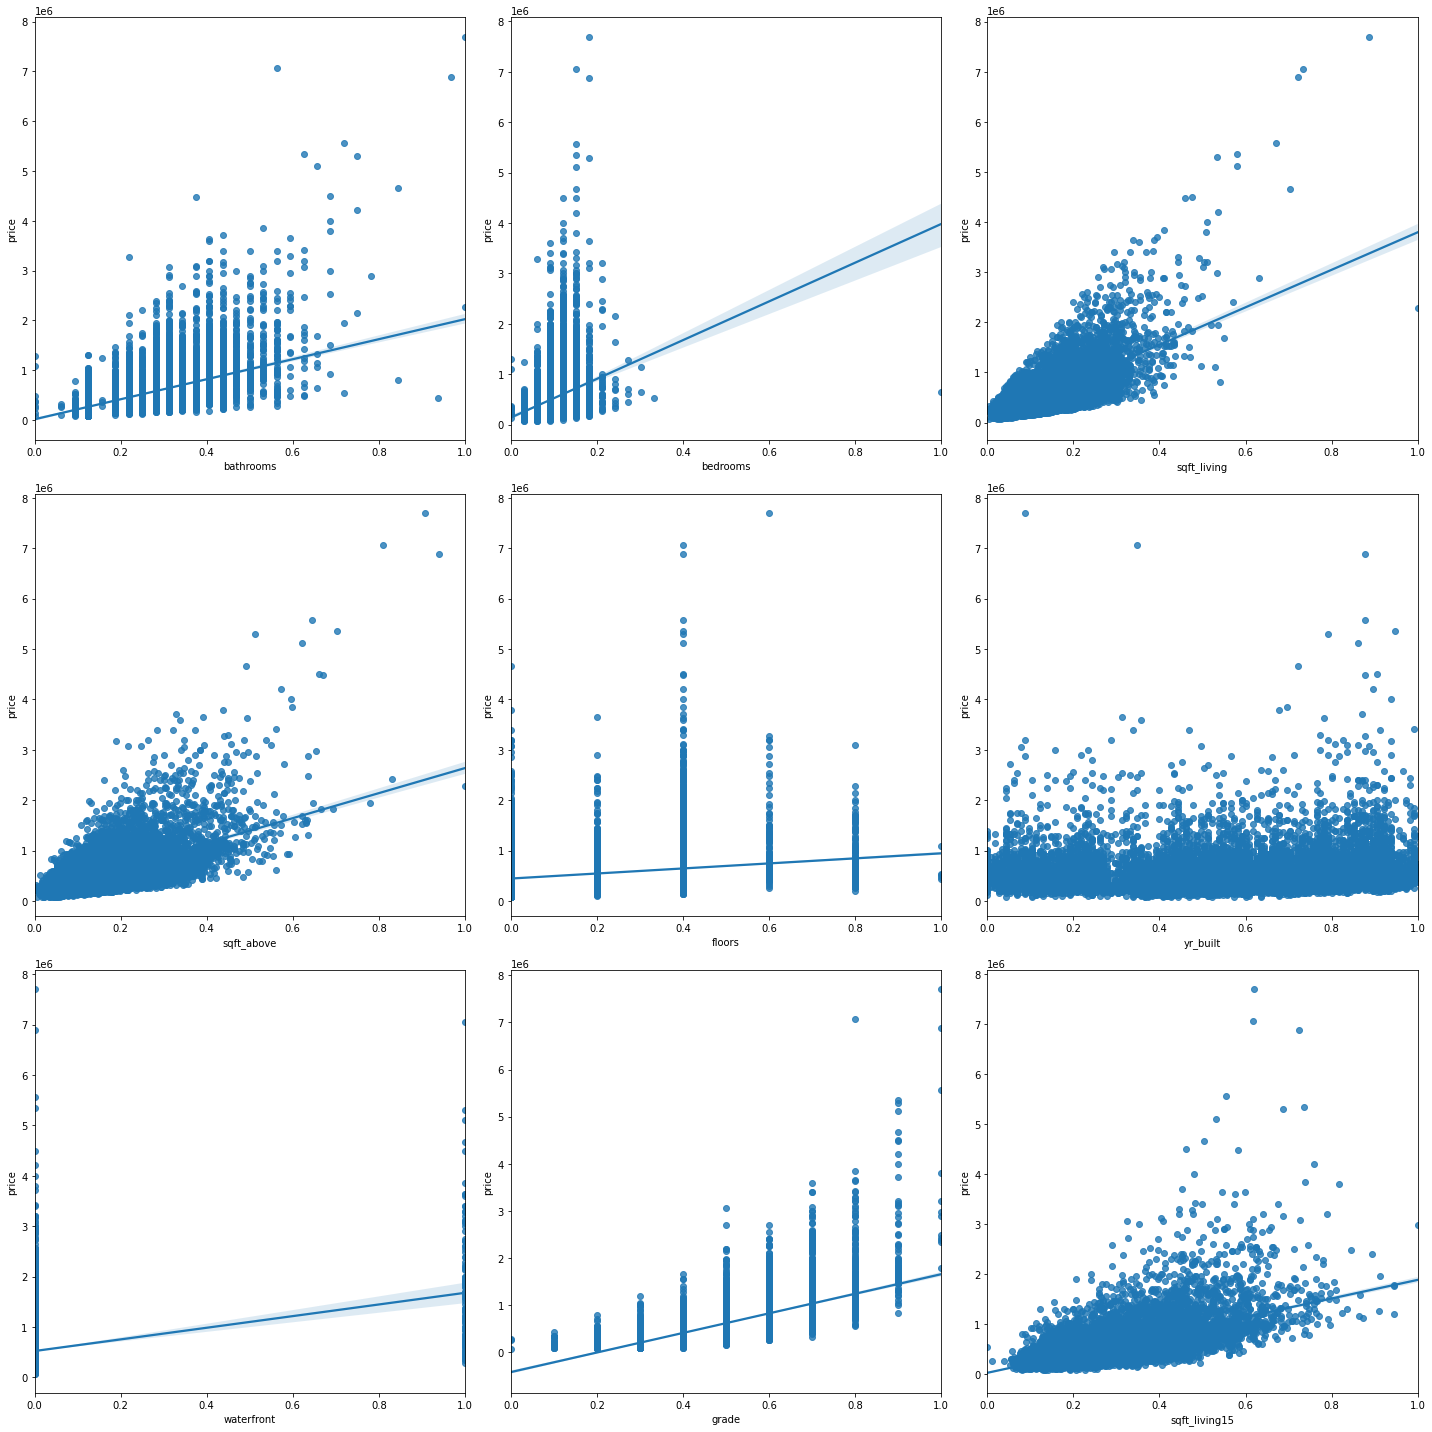

In [46]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = house_data['price'], x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y = house_data['price'], x = x['bedrooms'], ax = axs[0, 1])
sns.regplot(y = house_data['price'], x = x['sqft_living'], ax = axs[0, 2])
sns.regplot(y = house_data['price'], x = x['sqft_above'], ax = axs[1, 0])
sns.regplot(y = house_data['price'], x = x['floors'], ax = axs[1, 1])
sns.regplot(y = house_data['price'], x = x['yr_built'], ax = axs[1, 2])
sns.regplot(y = house_data['price'], x = x['waterfront'], ax = axs[2, 0])
sns.regplot(y = house_data['price'], x = x['grade'], ax = axs[2, 1])
sns.regplot(y = house_data['price'], x = x['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

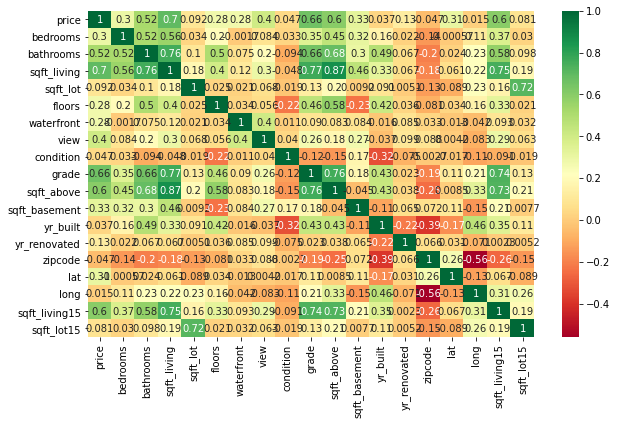

In [47]:
corrmat = house_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

## Data Splitting

In [48]:
from sklearn.model_selection import train_test_split
# Assign variables to capture train test split output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=25)

In [49]:
from sklearn.linear_model import LinearRegression


In [50]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [29]:
# Model evaluation for training set
y_train_pred = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_pred = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_test_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

          price  Predicted  Difference
9192   267100.0   267100.0         0.0
9046   329800.0   329800.0         0.0
910    234000.0   234000.0         0.0
5206   768500.0   768500.0         0.0
8470   649950.0   649950.0         0.0
6600   453000.0   453000.0         0.0
8019   278100.0   278100.0         0.0
10812  480000.0   480000.0         0.0
9264   273000.0   273000.0         0.0
4081   905000.0   905000.0         0.0 

Model training performance:
---------------------------
RMSE is 10330.12015716578
R2 score is 0.9991941285759267


          price  Predicted  Difference
12502  705000.0   552500.0   -152500.0
8037   775000.0   780000.0      5000.0
8902   350000.0   343500.0     -6500.0
9631   399000.0   550000.0    151000.0
3728   422000.0   510000.0     88000.0
740    360000.0   375000.0     15000.0
5036   280000.0   259000.0    -21000.0
13021  360000.0   312000.0    -48000.0
12438  680000.0   523460.0   -156540.0
14906  263950.0   247200.0    -16750.0 

Model testing performan

## Feature selection

In [31]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library
rfe = RFE(estimator= model , step = 1) 
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 9
Selected Features: [False False  True False False  True False False  True  True False  True
 False False  True  True  True  True]
Feature Ranking: [ 8  6  1  2  7  1  5  9  1  1  4  1 10  3  1  1  1  1]


In [63]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
8,grade,1
15,long,1
14,lat,1
11,yr_built,1
9,sqft_above,1
16,sqft_living15,1
17,sqft_lot15,1
5,waterfront,1
2,sqft_living,1
3,sqft_lot,2


In [37]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = model.fit(x_train_rfe, y_train)

In [58]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(x_test_rfe)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred_rfe)))
r2 = r2_score(y_test, y_pred_rfe)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred_rfe[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Tunned Model performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


          price  Predicted  Difference
12502  705000.0   951250.0    246250.0
8037   775000.0   925000.0    150000.0
8902   350000.0   350000.0         0.0
9631   399000.0   550000.0    151000.0
3728   422000.0   445000.0     23000.0
740    360000.0   411000.0     51000.0
5036   280000.0   253000.0    -27000.0
13021  360000.0   380000.0     20000.0
12438  680000.0   540000.0   -140000.0
14906  263950.0   239950.0    -24000.0 

Tunned Model performance:
---------------------------
RMSE is 182955.97180054025
R2 score is 0.7634381701750677




# Processing with Test data

In [13]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [14]:
test_pred=lr_rfe_model.predict(test_new)

In [15]:
test_pred

array([2280000., 2280000., 2280000., ..., 2280000., 2280000., 2280000.])

In [16]:
res = pd.DataFrame(test_pred)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_HP.csv")

In [17]:
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>